In [77]:
import pandas as pd
import numpy as np

offical_trainX = pd.read_csv("./data/dengue_features_train.csv")
offical_trainY = pd.read_csv("./data/dengue_labels_train.csv")



sj_official_trainX= offical_trainX[offical_trainX.city == "sj"]
iq_official_trainX= offical_trainX[offical_trainX.city == "iq"]

sj_len_X=len(sj_official_trainX)
iq_len_X=len(iq_official_trainX)

sj_trainX=sj_official_trainX[:749]
iq_trainX=iq_official_trainX[:416]

sj_testX=sj_official_trainX[749:]
iq_testX=iq_official_trainX[416:]

sj_official_trainY= offical_trainY[offical_trainY.city == "sj"]
iq_official_trainY= offical_trainY[offical_trainY.city == "iq"]

sj_len_Y=len(sj_official_trainY)
iq_len_Y=len(sj_official_trainY)

sj_trainY=sj_official_trainY[:749]
iq_trainY=iq_official_trainY[:416]

sj_testY=sj_official_trainY[749:]
iq_testY=iq_official_trainY[416:]

trainX = pd.concat((sj_trainX, iq_trainX), axis=0)
trainY = pd.concat((sj_trainY, iq_trainY), axis=0)
testX = pd.concat((sj_testX, iq_testX), axis=0)
testY = pd.concat((sj_testY, iq_testY), axis=0)

# trainX.head(),trainY.head()


In [78]:
#check data alignment
np.corrcoef(np.array(trainX.weekofyear), np.array(trainY.iloc[:,2]))

array([[1., 1.],
       [1., 1.]])

In [79]:
#check duplicates
print(f' trainX duplicates? {trainX.duplicated().unique()}')
print(f' trainY duplicates? {trainY.duplicated().unique()}')

 trainX duplicates? [False]
 trainY duplicates? [False]


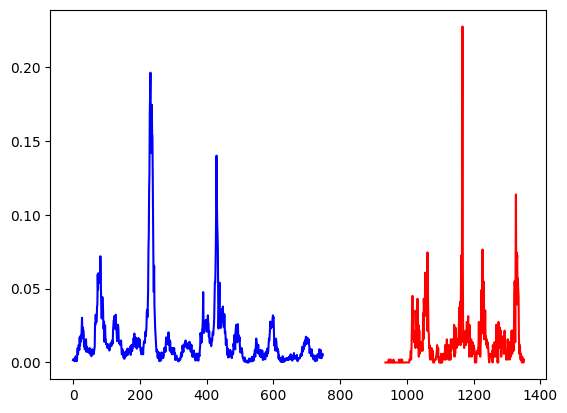

In [80]:
import matplotlib.pyplot as plt
plt.plot(sj_trainY.iloc[:,3]/2350, color='blue')
plt.plot(iq_trainY.iloc[:,3]/510, color='red')
# plt.legend()
# plt.plot(sj_trainY.iloc[:,3], color='blue')
# plt.plot(iq_trainY.iloc[:,3], color='red')


In [81]:
trainX.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1165.0,1999.517597,4.933309,1990.000000,1995.000000,2001.000000,2003.000000,2008.000000
weekofyear,1165.0,26.507296,14.888162,1.000000,14.000000,27.000000,39.000000,53.000000
ndvi_ne,1007.0,0.152329,0.134696,-0.406250,0.056800,0.140100,0.253995,0.493400
ndvi_nw,1120.0,0.140718,0.110903,-0.252800,0.064575,0.131486,0.218496,0.437100
ndvi_se,1145.0,0.205737,0.072667,-0.015533,0.158243,0.196786,0.251143,0.473400
ndvi_sw,1145.0,0.203754,0.082442,-0.063457,0.147957,0.190771,0.247029,0.546017
precipitation_amt_mm,1155.0,45.499697,44.113753,0.000000,9.515000,37.990000,70.055000,390.600000
reanalysis_air_temp_k,1158.0,298.632193,1.323282,294.635714,297.626071,298.582857,299.780000,301.637143
reanalysis_avg_temp_k,1158.0,299.156384,1.230883,294.892857,298.216071,299.232143,300.121429,302.928571
reanalysis_dew_point_temp_k,1158.0,295.185348,1.515125,289.642857,294.053214,295.567857,296.397143,297.852857


In [82]:
trainX.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  158
ndvi_nw                                   45
ndvi_se                                   20
ndvi_sw                                   20
precipitation_amt_mm                      10
reanalysis_air_temp_k                      7
reanalysis_avg_temp_k                      7
reanalysis_dew_point_temp_k                7
reanalysis_max_air_temp_k                  7
reanalysis_min_air_temp_k                  7
reanalysis_precip_amt_kg_per_m2            7
reanalysis_relative_humidity_percent       7
reanalysis_sat_precip_amt_mm              10
reanalysis_specific_humidity_g_per_kg      7
reanalysis_tdtr_k                          7
station_avg_temp_c                        36
station_diur_temp_rng_c                   36
station_max_temp_c                        14
station_mi

In [83]:
trainX = trainX.dropna()
trainY = trainY.loc[trainX.index]
target = trainY.iloc[:,3]
print(trainX.isnull().any().any())
print(trainY.isnull().any().any())

False
False


In [86]:
trainX.shape, trainY.shape

((956, 24), (956, 4))

In [89]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns

all_numerical_features = trainX.select_dtypes(include = ['int64', 'float64']).columns
all_categorical_features = trainX.select_dtypes(include = [object, 'datetime64']).columns

numerical_features = [value for value in all_numerical_features if value in data_select_col]
categorical_features = [value for value in all_categorical_features if value in data_select_col]
categorical_features, numerical_features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])
#Quantile encoding for categorical columns
#cat_enc = ce.count.CountEncoder()
# cat_enc = ce.QuantileEncoder()
# cat_enc = ce.hashing.HashingEncoder() ### NONONO 
# cat_enc = ce.james_stein.JamesSteinEncoder()
cat_enc = ce.target_encoder.TargetEncoder()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', cat_enc)])
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numerical_features),
                  ('cat', categorical_transformer, categorical_features)], 
    remainder='passthrough' # to let everything not trasnformed go through
)


data_select_col = ['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

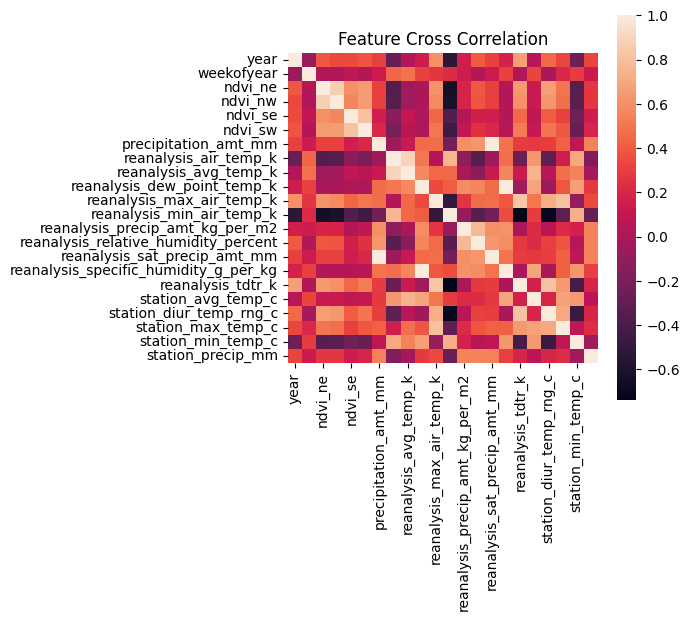

In [90]:
fig, ax = plt.subplots(figsize=(5,5))
cc_map = sns.heatmap(trainX.corr(method='spearman',numeric_only=True), ax=ax)
# SellerG and CouncilArea are quite correlated
# Type and Room are quite correlated
ax.set_title('Feature Cross Correlation')
ax.set_aspect('equal')
plt.show()

Ridge()
TRAIN - MAE =  15.409353564829631
TEST - MAE =  14.96850698206123
DecisionTreeRegressor()
TRAIN - MAE =  0.0
TEST - MAE =  15.484536082474227
ExtraTreeRegressor()
TRAIN - MAE =  0.0
TEST - MAE =  23.027491408934708
RandomForestRegressor()
TRAIN - MAE =  3.922520920502092
TEST - MAE =  13.780584192439862
BaggingRegressor()
TRAIN - MAE =  3.9740585774058577
TEST - MAE =  13.92508591065292
KNeighborsRegressor(n_neighbors=2)
TRAIN - MAE =  9.667364016736402
TEST - MAE =  18.09278350515464


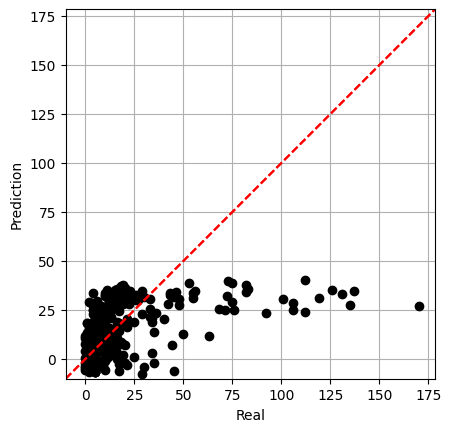

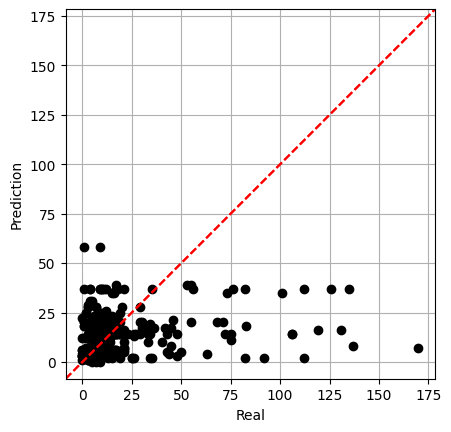

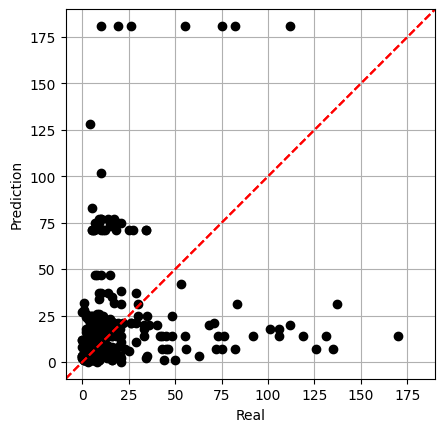

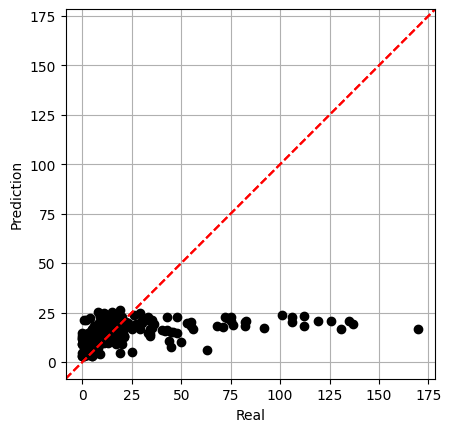

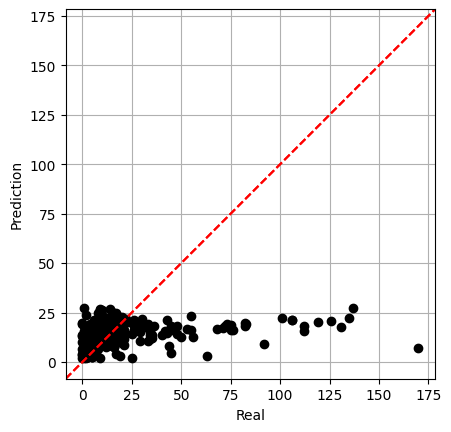

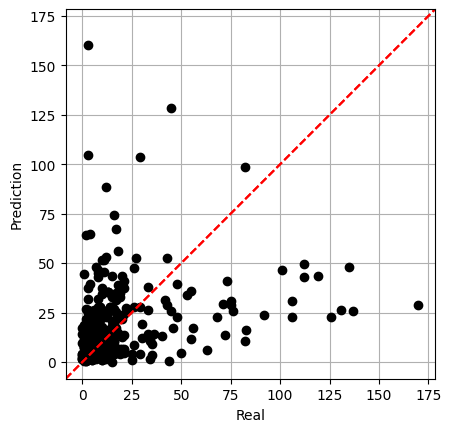

In [105]:

#import packages
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
# from sklearn.neural_network import MLPRegressor

regressors = [
    Ridge(),
    # ElasticNet(),
    # Lasso(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),    
    RandomForestRegressor(),
    # AdaBoostRegressor(), WORST
    BaggingRegressor(),
    # LinearSVR(), WORST
    # HistGradientBoostingRegressor(),
    KNeighborsRegressor(n_neighbors=2),
    ]
for regressor in regressors:
    #model pipeline
    print(regressor)
    reg_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)]
    )
    # print(lin_reg_pipe)
    Y_train = trainY.iloc[:,3]
    Y_test = testY.iloc[:,3]
    reg_pipe.fit(trainX.loc[:,data_select_col], Y_train)
    y_pred = reg_pipe.predict(testX.loc[:,data_select_col])
    y_train_pred = reg_pipe.predict(trainX.loc[:,data_select_col])
    # print('Mean Abs Percentage error = ', mean_absolute_percentage_error(y_test, y_pred))
    print(f'TRAIN - MAE =  {mean_absolute_error(Y_train, y_train_pred)}')
    print(f'TEST - MAE =  {mean_absolute_error(Y_test, y_pred)}')
    # print('TEST - Explained Variance = %.3f' % explained_variance_score(testY, y_pred))
    # print('Rˆ2 = ' ,r2_score(y_test, y_pred))
    # ct.fit_transform(ce_target.fit_transform(X_train, y_train), y_train)
    fig, ax1 = plt.subplots(nrows=1, ncols=1)
    ax1.plot(Y_test, y_pred, 'o', label='true_pred_scat',color='black')
    ax1.set_ylabel('Prediction')
    ax1.set_xlabel('Real')
    # title=f'{regressor} - Mean Absolute Error = {round(np.sqrt(mean_squared_error(Y_test, y_train_pred)),1)}'
    # ax1.set_title(title)


    axlims = []
    [axlims.append(a) for a in ax1.get_xlim()];
    [axlims.append(a) for a in ax1.get_ylim()];
    ax1.set_xlim(min(axlims), max(axlims))
    ax1.set_ylim(min(axlims), max(axlims))
    line = [[min(axlims), min(axlims)],
           [max(axlims), max(axlims)]]
    ax1.plot(line, line, linestyle='--', color='red')
    ax1.grid(True)
    ax1.set_aspect('equal')

In [96]:
Y_train = trainY.iloc[:,3]
np.array(Y_train

0       4
1       5
2       4
3       3
4       6
       ..
1344    1
1345    0
1346    2
1347    1
1348    1
Name: total_cases, Length: 956, dtype: int64